## Курсовая работа
Выполнил: Комиссаров Антон, группа М8О-109СВ-24

Датасет: [KITTI](https://paperswithcode.com/dataset/kitti)

### Информация о датасете

KITTI (Karlsruhe Institute of Technology and Toyota Technological Institute) - один из самых популярных наборов данных для использования в мобильной робототехнике и автономном вождении. Он состоит из многочасовых сценариев дорожного движения, записанных с помощью различных сенсоров, включая RGB с высоким разрешением, стереокамеры в оттенках серого и 3D-лазерный сканер. Набор данных содержит 7481 обучающих изображения, помеченных трехмерными ограничивающими рамками.

Распознанные объекты делятся на 8 классов:
0. Car — Автомобили.
2. Van — Вэны.
3. Truck — Грузовики.
4. Pedestrian — Пешеходы.
5. Person_sitting — Сидящий человек.
6. Cyclist — Велосипедисты.
7. Tram — Трамваи.
8. Misc — Прочие объекты.

Датасет используется для разработки и тестирования алгоритмов автономных транспортных средств: обнаружения объектов (Object Detection), сегментации изображений (Semantic Segmentation), трекинга (Tracking) и т. д.

У датасета есть лоудер для TensorFlow:

In [1]:
!pip install tensorflow

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('KITTI', with_info=True)
print(info)

Пример данных из датасета:

,image,image/file_name,objects/alpha,objects/bbox,objects/dimensions,objects/location,objects/occluded,objects/rotation_y,objects/truncated,objects/type
0,,004448.png,1.7,,"ndarray(shape=(3,), dtype=float32)","ndarray(shape=(3,), dtype=float32)",0 (fully visible),1.59,0.0,0 (Car)
1,,007426.png,-1.58-0.920.392.05,,"ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)","ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)",0 (fully visible)0 (fully visible)0 (fully visible)1 (partly occluded),-1.65-1.06-0.321.73,0.00.00.630.0,0 (Car)0 (Car)0 (Car)0 (Car)
2,,003007.png,-1.512.01.79,,"ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)","ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)",0 (fully visible)0 (fully visible)0 (fully visible),-1.51.571.58,0.00.00.0,2 (Truck)0 (Car)0 (Car)
3,,000503.png,-1.59-1.51-1.572.19,,"ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)","ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)",0 (fully visible)0 (fully visible)2 (largely occluded)0 (fully visible),-1.6-1.6-1.571.56,0.00.00.00.0,0 (Car)0 (Car)1 (Van)0 (Car)
4,,003379.png,-2.01-1.74-1.84-1.87-1.84-1.67,,"ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)","ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)ndarray(shape=(3,), dtype=float32)",3 (unknown)3 (unknown)2 (largely occluded)0 (fully visible)2 (largely occluded)3 (unknown),-1.42-1.48-1.56-1.57-1.53-1.49,0.060.00.00.00.00.0,5 (Cyclist)5 (Cyclist)3 (Pedestrian)3 (Pedestrian)7 (Misc)5 (Cyclist)

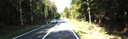
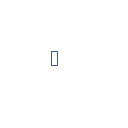
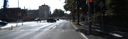
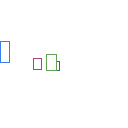
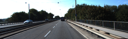
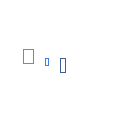
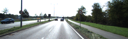
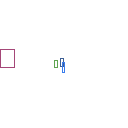
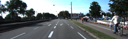
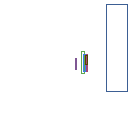

In [14]:
train_data = dataset['train']
tfds.as_dataframe(train_data.take(5), info)

Разбиение объектов на классы в обучающей выборке:

		Распределение объектов по классам:
Всего: 33415
Car: 23584 (70.58%)
Truck: 969 (2.90%)
Van: 2284 (6.84%)
Cyclist: 1508 (4.51%)
Pedestrian: 3820 (11.43%)
Misc: 568 (1.70%)
Person_sitting: 222 (0.66%)
Tram: 460 (1.38%)


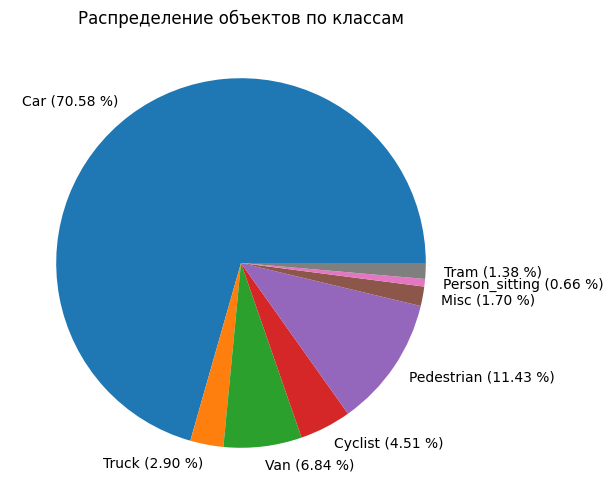

In [22]:
from collections import defaultdict
from matplotlib import pyplot as plt


def class_distribution(objects: dict):
    print('\t\tРаспределение объектов по классам:')
    print(f'Всего: {(objects_count := sum(objects.values()))}')
    for name, count in objects.items():
        print(f'{name}: {count} ({(count / objects_count) * 100:.2f}%)')
    plt.figure(figsize=(8, 6))
    sizes = list(map(lambda value: value / sum(objects.values()) * 100, objects.values()))
    plt.pie(sizes, labels=[f'{l} ({p:.2f} %)' for l, p in zip(objects.keys(), sizes)], colors=plt.cm.tab10.colors)
    plt.title('Распределение объектов по классам')
    plt.show()


classes = info.features['objects'].feature['type'].names
object_counts = defaultdict(int)
for item in iter(train_data):
    for detected_object in item['objects']['type']:
        object_counts[classes[detected_object.numpy()]] += 1
class_distribution(object_counts)

### Применение алгоритма
Реализуем модель для распознавания объектов:

In [ ]:
!git clone https://github.com/elihagen/EnhancingAI_Project.git

In [24]:
!python EnhancingAI_Project/Programming/HPC_files/Programming/main.py --dataset "kitti"

2024-12-23 01:48:14.371186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 01:48:14.390830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 01:48:14.396825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 01:48:15.432413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1734918497.737057   16887 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

Выводим результаты обработки:

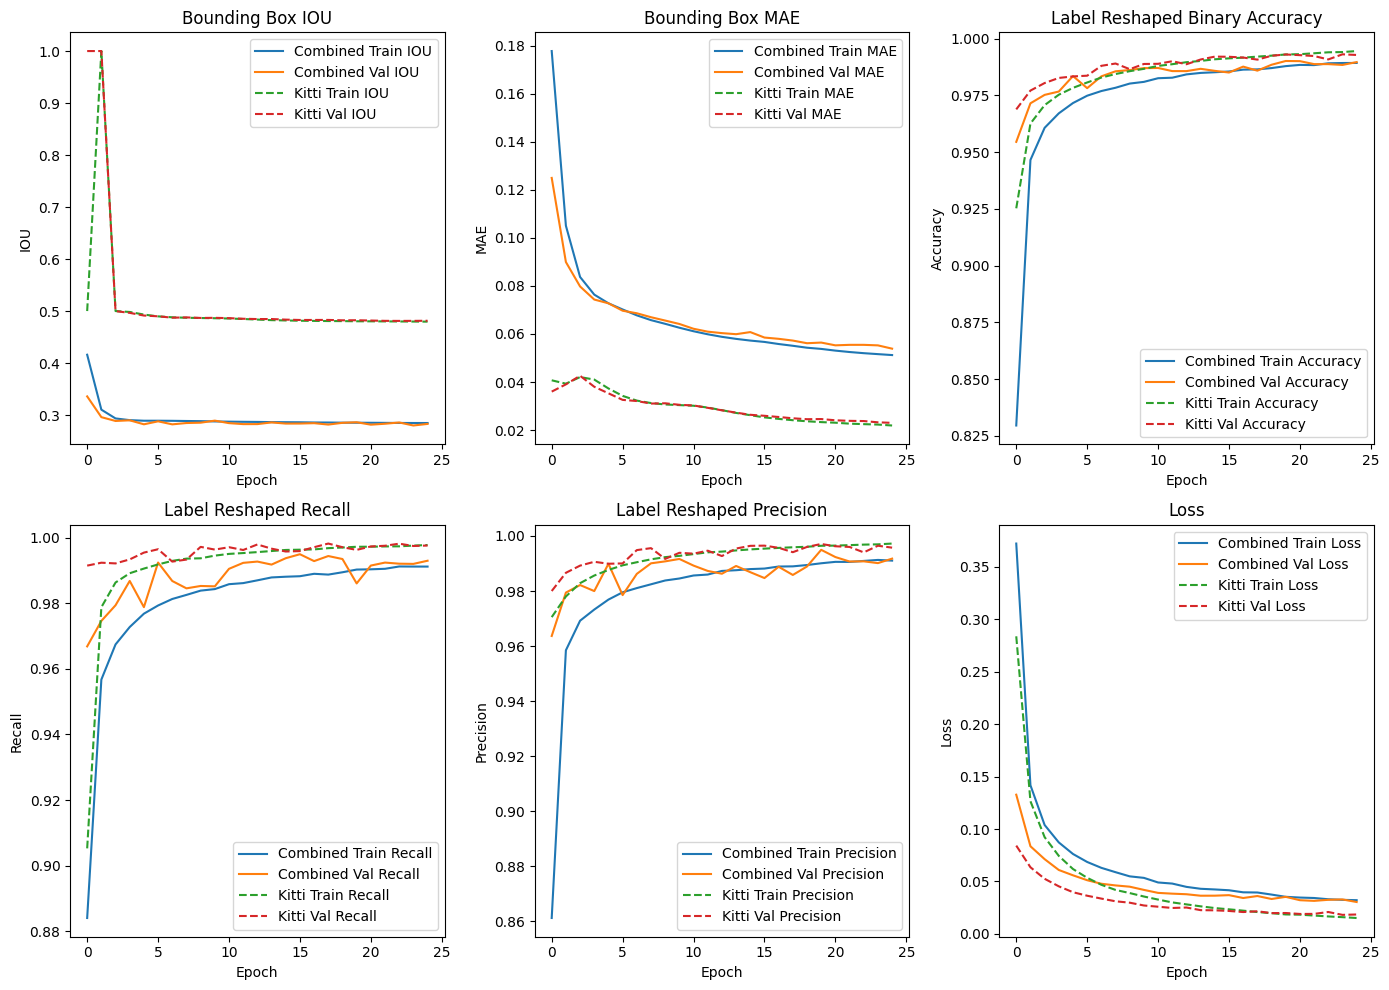

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


file_path_combined = 'EnhancingAI_Project/Programming/Results/train_log_kitti_combined.csv'
file_path_kitti ='EnhancingAI_Project/Programming/Results/train_log_kitti_val.csv'
df_combined = pd.read_csv(file_path_combined)
df_kitti = pd.read_csv(file_path_kitti)

plt.figure(figsize=(14, 10))

# Subplot 1: IOU
plt.subplot(2, 3, 1)
plt.plot(df_combined['epoch'], df_combined['bbox_reshaped_binary_io_u'], label='Combined Train IOU')
plt.plot(df_combined['epoch'], df_combined['val_bbox_reshaped_binary_io_u'], label='Combined Val IOU')
plt.plot(df_kitti['epoch'], df_kitti['bbox_reshaped_binary_io_u'], label='Kitti Train IOU', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_bbox_reshaped_binary_io_u'], label='Kitti Val IOU', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.title('Bounding Box IOU')
plt.legend()

# Subplot 2: MAE
plt.subplot(2, 3, 2)
plt.plot(df_combined['epoch'], df_combined['bbox_reshaped_mae'], label='Combined Train MAE')
plt.plot(df_combined['epoch'], df_combined['val_bbox_reshaped_mae'], label='Combined Val MAE')
plt.plot(df_kitti['epoch'], df_kitti['bbox_reshaped_mae'], label='Kitti Train MAE', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_bbox_reshaped_mae'], label='Kitti Val MAE', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Bounding Box MAE')
plt.legend()

# Subplot 3: Accuracy
plt.subplot(2, 3, 3)
plt.plot(df_combined['epoch'], df_combined['label_reshaped_binary_accuracy'], label='Combined Train Accuracy')
plt.plot(df_combined['epoch'], df_combined['val_label_reshaped_binary_accuracy'], label='Combined Val Accuracy')
plt.plot(df_kitti['epoch'], df_kitti['label_reshaped_binary_accuracy'], label='Kitti Train Accuracy', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_label_reshaped_binary_accuracy'], label='Kitti Val Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Label Reshaped Binary Accuracy')
plt.legend()

# Subplot 4: Recall
plt.subplot(2, 3, 4)
plt.plot(df_combined['epoch'], df_combined['label_reshaped_recall'], label='Combined Train Recall')
plt.plot(df_combined['epoch'], df_combined['val_label_reshaped_recall'], label='Combined Val Recall')
plt.plot(df_kitti['epoch'], df_kitti['label_reshaped_recall'], label='Kitti Train Recall', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_label_reshaped_recall'], label='Kitti Val Recall', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Label Reshaped Recall')
plt.legend()

# Subplot 5: Precision
plt.subplot(2, 3, 5)
plt.plot(df_combined['epoch'], df_combined['label_reshaped_precision'], label='Combined Train Precision')
plt.plot(df_combined['epoch'], df_combined['val_label_reshaped_precision'], label='Combined Val Precision')
plt.plot(df_kitti['epoch'], df_kitti['label_reshaped_precision'], label='Kitti Train Precision', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_label_reshaped_precision'], label='Kitti Val Precision', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Label Reshaped Precision')
plt.legend()

# Subplot 6: Loss
plt.subplot(2, 3, 6)
plt.plot(df_combined['epoch'], df_combined['loss'], label='Combined Train Loss')
plt.plot(df_combined['epoch'], df_combined['val_loss'], label='Combined Val Loss')
plt.plot(df_kitti['epoch'], df_kitti['loss'], label='Kitti Train Loss', linestyle='--')
plt.plot(df_kitti['epoch'], df_kitti['val_loss'], label='Kitti Val Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Кластеризация

Определим оптимальное число кластеров (метод локтя):

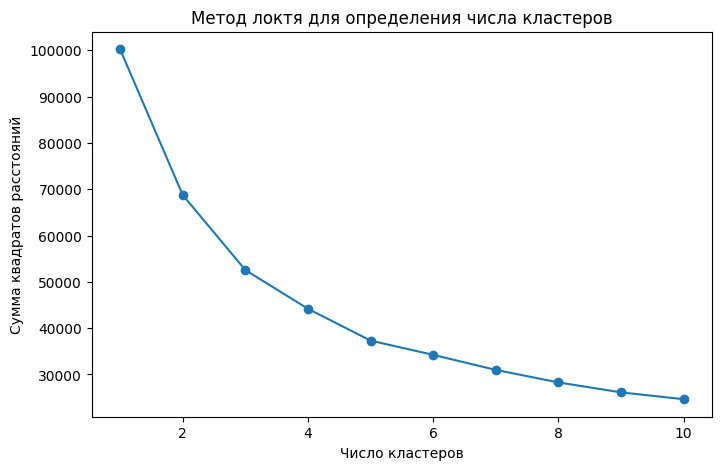

In [54]:
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

index = 1
X = []
for item in iter(train_data):
    X.extend(item['objects']['location'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.array(X))

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Исходя из полученного графика можно поделить данные на 4 кластера:

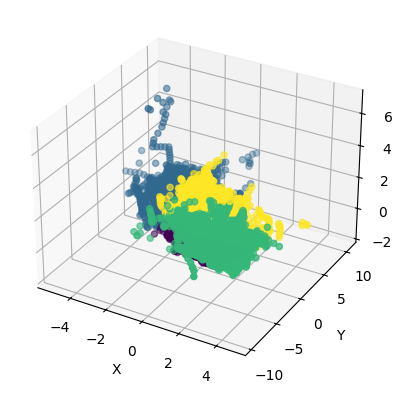

In [62]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Выбивающися показатели

По круговой диаграмме классов явно видно неравномерное распределение объектов в датасете.

Найдём выбросы с помощью IsolationForest:

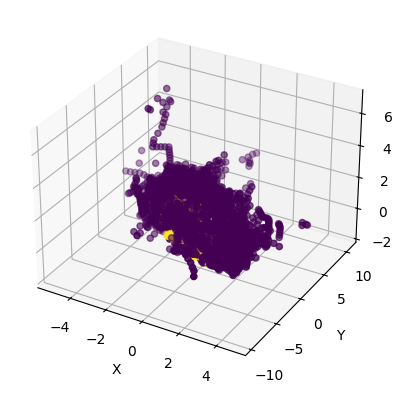

In [72]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
outliers = model.fit_predict(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=outliers, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### ML-systems design

Датасет может применяться для распознавания и отслеживания объектов (транспорта). Например, датасет можно использвать для системы контроля скорости на дорогах.

Преимущества:
* Достаточно высокая точность на реальных данных.
* Быстрая скорость обучения.
* Относительно небольшой по размеру датасет.
* Наличие разметки данных.
* Наличие различной информации в датасете для решения комплексных задач.

Недостатки:
* Несбалансированность объектов по классам.